In [233]:
# Imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# # Decision Tree for comparison
from sklearn.tree import DecisionTreeClassifier
# # Used for outputting images from a file
from IPython.display import display, Image

# # If any figures change, set to true
gen_new_plot=False

In [234]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")
y = np.ravel(y)

# Section 1B: Initial comparison of KNN versus the Decision Tree

In [235]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

accuracy_knn = knn.fit(X_train, y_train).score(X_test, y_test)
accuracy_tree = tree.fit(X_train, y_train).score(X_test, y_test)

print("Accuracy of KNN: ", accuracy_knn, "\nAccuracy of DT: ", accuracy_tree)





Accuracy of KNN:  0.4572449207412369 
Accuracy of DT:  0.9231971422192453


# Section 2 : Scaling the Data

Scale the dataset. Additionaly, multiply the "mpg scaled" attribute by a weight of `mpg_weight` to adjust the impact for groupings of this attribute.

In [236]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
columns = X.columns + " scaled"
X_scaled = pd.DataFrame(X_scaled, columns=columns)

In [237]:
# adjust the 'mpg scaled' feature
display(X_scaled.head())

,year scaled,price scaled,mileage scaled,mpg scaled,engineSize scaled,Automatic scaled,Manual scaled,Semi-Auto scaled,Diesel scaled,Electric scaled,Hybrid scaled,Petrol scaled
0,0.875000,0.211101,0.089747,0.203867,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.916667,0.247798,0.051125,0.203867,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.875000,0.229450,0.070113,0.203867,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.958333,0.312018,0.058877,0.107735,0.3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.958333,0.293670,0.008337,0.154144,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [238]:
# X_scaled.to_csv("X_scaled.csv", index=False)

---

# Section 3: Designing the KNN Model

Read the scaled data from files. Store the features and targets to variables. These variables will be used for train-test splitting.

In [239]:
# read scaled data for non-target attributes
X_scaled = pd.read_csv("X_scaled.csv")

# read the target attribute
y = pd.read_csv("y.csv").to_numpy().ravel()

### study interactions

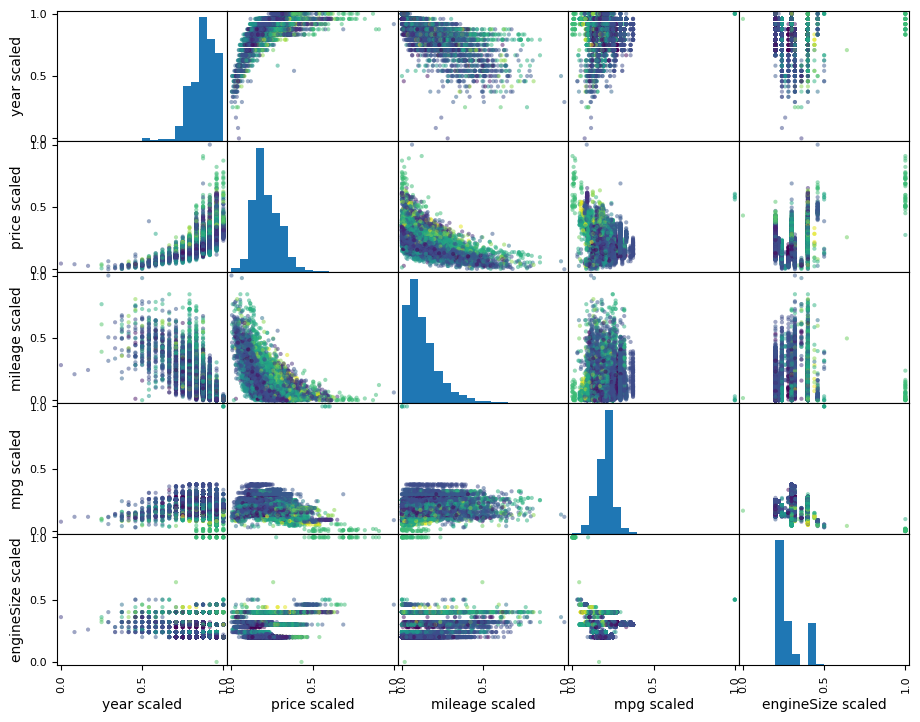

In [240]:
if (gen_new_plot):

    # labels for pairwise plots
    from sklearn.preprocessing._label import LabelEncoder
    
    pd.plotting.scatter_matrix(
        X_scaled[X_scaled.columns[[0,1,2,3,4]]],
        c=LabelEncoder().fit(y).transform(y),
        diagonal='hist',
        hist_kwds={'bins':20},
        figsize=(11, 8.5),
    )
    plt.show()
else:
    display(Image(filename=".CompiledKNN/PairPlot.png"))


Divide data into training and test sets

In [241]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y,
    random_state=0
)

In [242]:
display(X_train_scaled.shape, y_train.shape)
display(X_test_scaled.shape, y_test.shape)

(13434, 12)

(13434,)

(4479, 12)

(4479,)

--- 

# Section 4: Decision Tree Comparision

Create a decision tree and a KNN from the dataset and compare accuracies of each model

In [243]:
tree = DecisionTreeClassifier(
    random_state=0
)
knn = KNeighborsClassifier()


# import the scaled data and split into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    pd.read_csv("X_scaled.csv"), 
    pd.read_csv("y.csv"), 
    random_state=0
)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

tree.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# hacky way to clear the output
display() 

In [244]:
print("Accuracies on the test set")
print("tree accuracy: " + str(tree.score(X_test_scaled, y_test)))
print("knn accuracy: " + str(knn.score(X_test_scaled, y_test)))

Accuracies on the test set
tree accuracy: 0.9229738780977896
knn accuracy: 0.8374637195802634


Create a decision tree and a KNN from the secondary dataset and compare accuracies of each model

---

# Section 5: Cross Validation

Evaluate the accuracy of a 10-fold cross validation for the KNN model.

In [245]:
# features = pd.concat([X_scaled, X2_scaled], ignore_index=True, verify_integrity=True)
features = X_scaled

In [246]:
# target = pd.DataFrame(np.append(y, y2))
target = pd.DataFrame(y, columns=["model"])

In [247]:
models = target.model.unique().tolist()

In [248]:
indexes = np.empty(shape=0, dtype=np.uint16)

display(target.shape[0])

for model in models:
    mask = (target.model == model)
    if (target[mask].shape[0] <= 50):
        index = target[mask].index[:]
        print(model, "- remove", index.shape[0], "record(s)")
        indexes = np.append(indexes, index)

target = target.drop(index=indexes, axis=0)
features = features.drop(index=indexes, axis=0)

display(target.shape[0])

17913

 Tourneo Connect - remove 33 record(s)
 Fusion - remove 16 record(s)
 Ranger - remove 1 record(s)
 Streetka - remove 2 record(s)
 Escort - remove 1 record(s)
 Transit Tourneo - remove 1 record(s)


17859

In [249]:
models = target.model.unique().tolist()

In [250]:
print(models)

[' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang', ' Grand Tourneo Connect']


In [251]:
target = target.to_numpy().ravel()

In [252]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, features, target, cv=10)

In [253]:
cv.mean()

0.8472993497510988

In [254]:
tree = DecisionTreeClassifier(
    random_state=0
)

cv_tree = cross_val_score(tree, features, target, cv=10)
cv_tree.mean()

0.9235098384258519

---


# Accuracy Assessment on individual targets

In [255]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    features, target,
    random_state=0
)

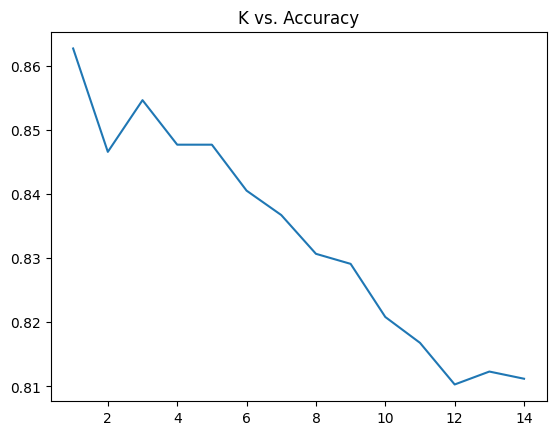

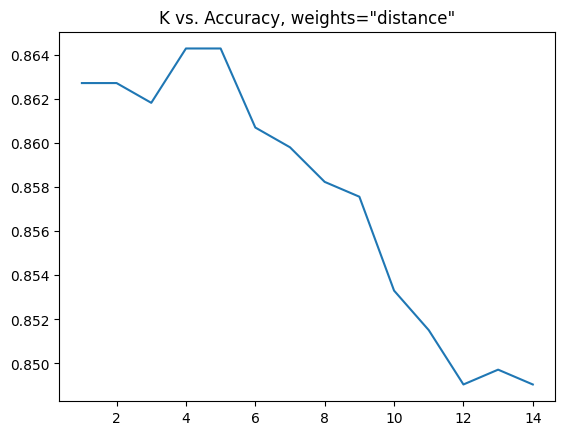

In [256]:
gen_new_plot=False
if (gen_new_plot):
    # KNN without distance weighting
    arr = np.array([])
    y_test = y_test.squeeze()
    for n in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=n, weights="uniform")
        knn.fit(X_train_scaled, y_train)
        y1_predict = knn.predict(X_test_scaled)
        m = np.mean(y1_predict == y_test)
        arr = np.append(arr, np.array(m))
    plt.plot(range(1, arr.size+1), arr)
    plt.title("K vs. Accuracy, no weights")
    plt.show()
    # KNN with distance weighting
    arr = np.array([])
    y_test = y_test.squeeze()
    for n in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=n, weights="distance")
        knn.fit(X_train_scaled, y_train)
        y1_predict = knn.predict(X_test_scaled)
        m = np.mean(y1_predict == y_test)
        arr = np.append(arr, np.array(m))
    plt.plot(range(1, arr.size+1), arr)
    plt.title("K vs. Accuracy, weights=\"distance\"")
    plt.show()
else:
    filename = ".CompiledKNN/K_vs._Accuracy.png"
    display(Image(filename=filename))
    filename = ".CompiledKNN/K vs. Accuracy - weighted.png"
    display(Image(filename=filename))

In [257]:
# No weights
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_predict = knn.predict(X_test_scaled)
print("KNN Test accuracy: ", knn.score(X_test_scaled, y_test))
print("KNN training accuracy: ", knn.score(X_train_scaled, y_train))

# Weighted
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train_scaled, y_train)
y_predict = knn.predict(X_test_scaled)
print("KNN Test accuracy: ", knn.score(X_test_scaled, y_test))
print("KNN training accuracy: ", knn.score(X_train_scaled, y_train))

KNN Test accuracy:  0.8627099664053751
KNN training accuracy:  1.0
KNN Test accuracy:  0.8642777155655095
KNN training accuracy:  1.0


array([' Fiesta', ' C-MAX', ' KA', ' EcoSport', ' Kuga', ' Grand C-MAX',
       ' S-MAX', ' Puma', ' Mondeo', ' Ka+', ' B-MAX', ' Galaxy',
       ' Focus', ' Edge', ' Grand Tourneo Connect'], dtype=object)

(323,)

323

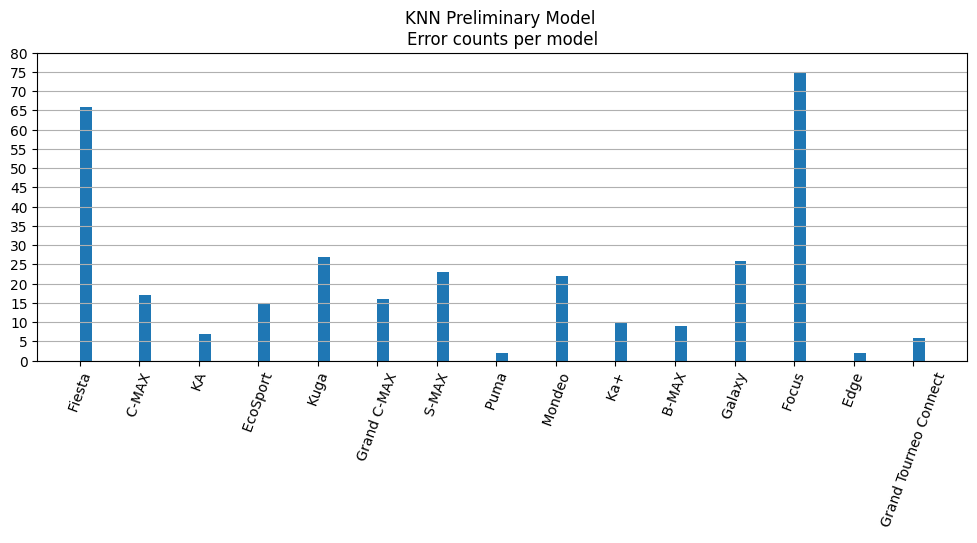

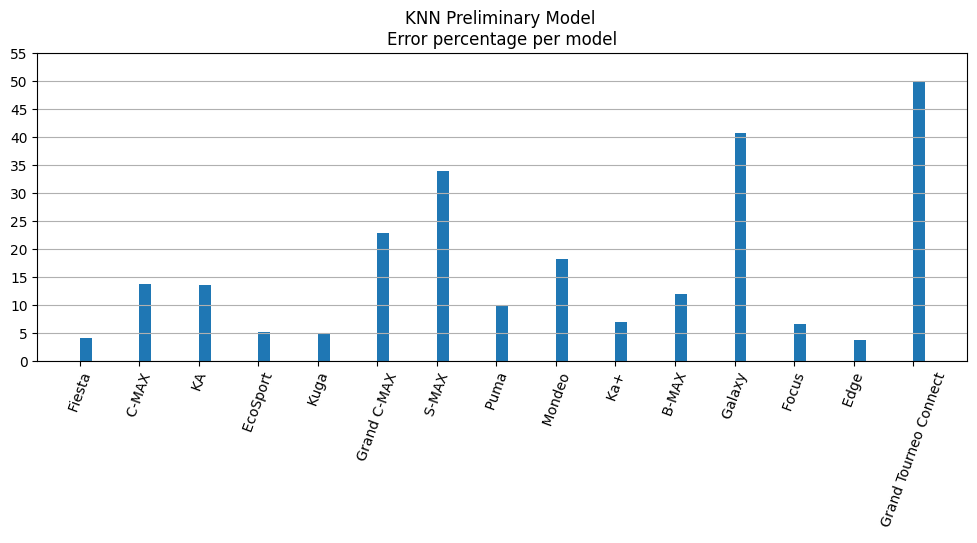

In [229]:
misclassified_y = y_test[y_test != y_predict]

names = pd.Series(misclassified_y).unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y[misclassified_y == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.yticks(range(0, int(error_counts.max())+10, 5))
plt.grid(axis='y')
plt.title("KNN Preliminary Model \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.yticks(range(0, int(error_percentage.max())+10,5))
plt.grid(axis='y')
plt.title("KNN Preliminary Model \nError percentage per model")
plt.show()

### Assess Accuracy of decision tree for comparison

In [231]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_predict = tree.predict(X_test_scaled)
display(tree.score(X_test_scaled, y_test))

0.9247480403135498

array([' Fiesta', ' C-MAX', ' KA', ' S-MAX', ' EcoSport', ' Kuga',
       ' Grand C-MAX', ' Puma', ' Mondeo', ' Focus', ' Ka+', ' B-MAX',
       ' Galaxy', ' Edge', ' Grand Tourneo Connect'], dtype=object)

(336,)

336

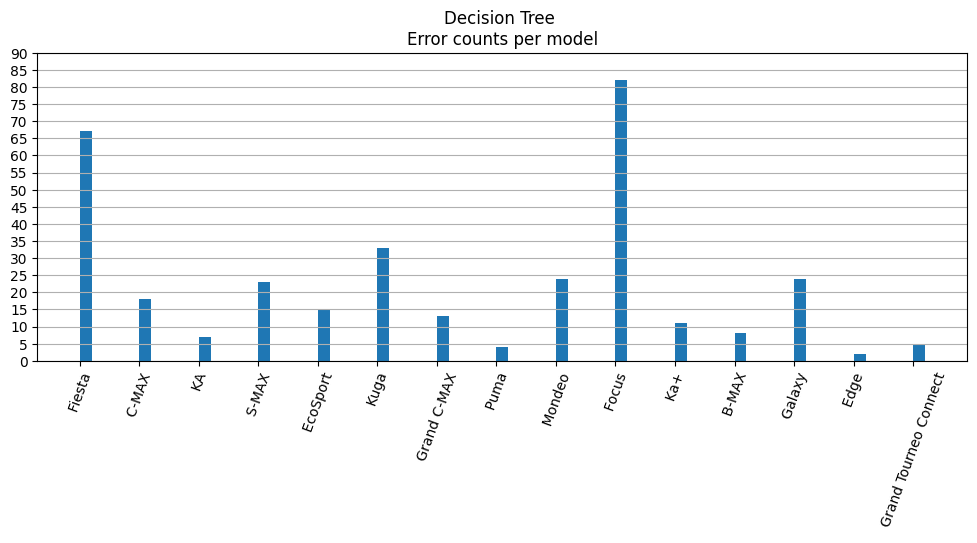

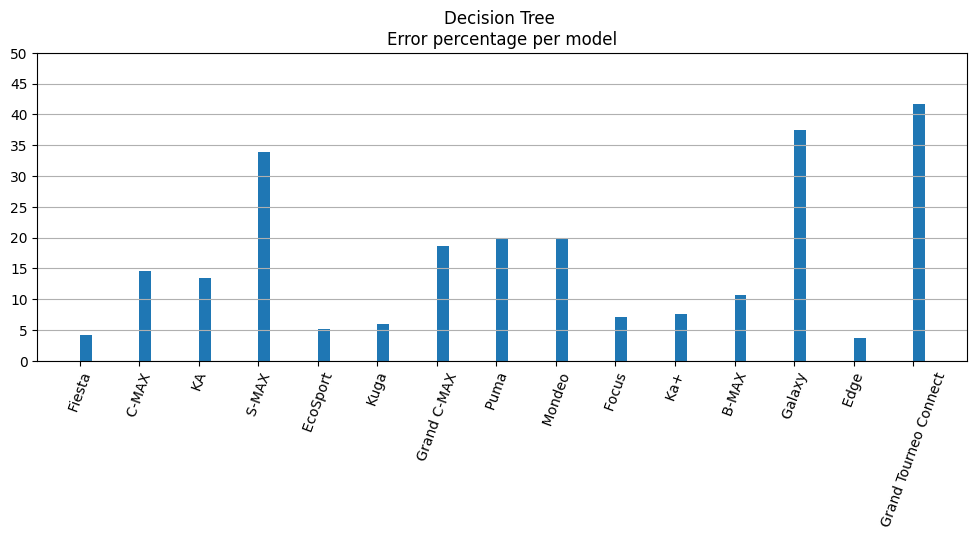

In [232]:
misclassified_y = y_test[y_test != y_predict]

names = pd.Series(misclassified_y).unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y[misclassified_y == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.yticks(range(0, int(error_counts.max())+10, 5))
plt.grid(axis='y')
plt.title("Decision Tree \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.yticks(range(0, int(error_percentage.max())+10,5))
plt.grid(axis='y')
plt.title("Decision Tree \nError percentage per model")
plt.show()

In [218]:
display(tree.feature_importances_)
display(tree.feature_names_in_)

array([0.05820709, 0.12680608, 0.05623338, 0.48962823, 0.19387084,
       0.0033777 , 0.04742968, 0.00187903, 0.00070006, 0.        ,
       0.00120641, 0.02066149])

array(['year scaled', 'price scaled', 'mileage scaled', 'mpg scaled',
       'engineSize scaled', 'Automatic scaled', 'Manual scaled',
       'Semi-Auto scaled', 'Diesel scaled', 'Electric scaled',
       'Hybrid scaled', 'Petrol scaled'], dtype=object)